**Project Description:** 
- The data is from an online store - Ice - selling video games. The information available in this data set are user, critics reviews; genre, platforms, historical games sales in different region (North America, Europe, Japan and other) 
- This analysis help answering the questions what games, what genres or what platforms are potential big winners. This would assist in planning suitable marketing/advertising campaigns.   

# I. Open the data and study the general information

In [1]:
import pandas as pd 
import numpy as np
import math 

import nltk 
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
import string
from string import digits
import re
from collections import Counter

import math 
from matplotlib import pyplot as plt 
from math import factorial 

from scipy import stats as st

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hoang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hoang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_games = pd.read_csv('games.csv')
df_original = df_games.copy()
df_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- There are missing values in the column 'Name', 'Year_of_Release', 'Critic_Score', 'User_Score', 'Rating 

Text(0.5, 1.0, 'Ratio of missing values per columns')

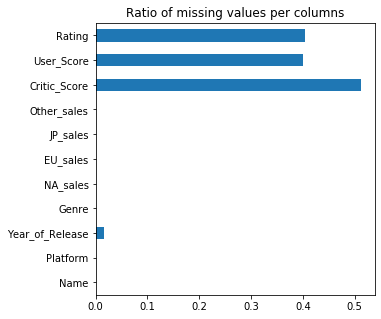

In [4]:
plt.figure(figsize=(5,5))
df_games.isnull().mean(axis=0).plot.barh()
plt.title('Ratio of missing values per columns')

- The columns that have the least null values are 'Name' and 'Year_of_Released' 

# II) Prepare the data
1) Replace the name of the columns

2)  Handling Missing values 

3) Convert the data to the required types

4) Describe the columns where the data types have been changed and why.

5) Checking to see if there is any duplicates 

6) Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

### 1) Replace the name of the columns:
- Change the current names to lower cases name 

In [5]:
df_games.columns = ['names','platform','year_of_released','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating']
df_original.columns = ['names','platform','year_of_released','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating']
df_games

,names,platform,year_of_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### 2) Handling missing values

   a) Removing missing values from the column 'names'
   
   b) 'Year_of_release': The null can be found in the names (eg 'wwe Smackdown vs. Raw 2006') or in the previous information. For the remaining values, I would group by the platform. This make senses because the games creation and its platform goes hand in hand with each other.
      * It won't make sense if we have a game played by PS4 but created in 1940. 

In [6]:
# Missing values in 'names' column
df_games.dropna(subset=['names'],inplace=True)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
names               16713 non-null object
platform            16713 non-null object
year_of_released    16444 non-null float64
genre               16713 non-null object
na_sales            16713 non-null float64
eu_sales            16713 non-null float64
jp_sales            16713 non-null float64
other_sales         16713 non-null float64
critic_score        8137 non-null float64
user_score          10014 non-null object
rating              9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [7]:
#Missing values in year_of_released column
names_w_released_year = df_games[df_games['year_of_released'].notnull()][['names','year_of_released']]
names_w_released_year.drop_duplicates(keep=False,inplace=True)
names_w_released_year = dict(zip(names_w_released_year.names, names_w_released_year.year_of_released))

#Creating a pivot table with platform as an index
platform_pvtable =  df_games.pivot_table(index='platform')
platform_pvtable

,critic_score,eu_sales,jp_sales,na_sales,other_sales,year_of_released
platform,,,,,,
2600,NaN,0.041128,0.000000,0.681203,0.006842,1982.137931
3DO,NaN,0.000000,0.033333,0.000000,0.000000,1994.666667
3DS,67.101190,0.118231,0.193596,0.160558,0.025692,2013.126953
DC,87.357143,0.032500,0.164615,0.104423,0.005192,1999.942308
DS,63.761506,0.087815,0.081623,0.177778,0.027550,2008.185290
GB,NaN,0.487959,0.868571,1.166531,0.083673,1995.958763
GBA,67.372146,0.091545,0.057579,0.228151,0.009404,2003.210851
GC,69.488839,0.069622,0.038813,0.240036,0.009317,2003.400369
GEN,NaN,0.204444,0.098889,0.713704,0.032963,1993.037037


In [8]:
def year_released_grouping(row): 
    names = row[0]
    year_of_released = row[1]
    if (np.isnan(year_of_released)==True) & (names in names_w_released_year): 
        return names_w_released_year[names]
    elif (np.isnan(year_of_released)==False):
        return year_of_released
    else:   
        a=[int(s) for s in names.split() if s.isdigit()]
        if len(a)>0:
            for i in range(len(a)): 
                if a[i]>1000: 
                    return(a[i])
                else: 
                    return 0
        else: 
            return(0)
def platform_year_grouping(row):
    platform=row[0]
    year_of_released=row[1]
    if (year_of_released == 0):
        return round(platform_pvtable.loc[platform,'year_of_released'])
    else: 
        return round(year_of_released)

In [9]:
df_games['year_of_released']=df_games[['names','year_of_released']].apply(year_released_grouping, axis=1 )
df_games['year_of_released']=df_games[['platform','year_of_released']].apply(platform_year_grouping,axis=1)

In [10]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
names               16713 non-null object
platform            16713 non-null object
year_of_released    16713 non-null float64
genre               16713 non-null object
na_sales            16713 non-null float64
eu_sales            16713 non-null float64
jp_sales            16713 non-null float64
other_sales         16713 non-null float64
critic_score        8137 non-null float64
user_score          10014 non-null object
rating              9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


c) For the 'user_score' and 'critic_score' columns: 

- I notice that 'user_group' has an object type. I need to convert that to float first before handling any missing values 

- I would then group by names to find the corresponding score that already have either 'critic_score' and 'user_score' in the original file. 

- Thirdly, there are rows that have null in either 'critic_score' or 'user_score'. It means that there are value in 'critic_score' but null in 'user_score' or vice versa. In this case, I would find the average difference between the 2 score. Then use that average to fill in the missing values

- Lastly, to fill out the remaining score, I would group the score based on their genre, find the average score per genre then use that to fill the remaining missing values. I chose the genre instead of platform because to evaluate a game, usually, it would get rated by the popularity, and its content; so it makes sense that with a more famous genre, more money on to develop a better content; this leads to a high score in either user/critic_score 

In [11]:
#Filling user_score null values with 0 so that we can convert 'user_score' from str to integer
df_games['user_score'].fillna('0.0',inplace=True)
df_games.loc[df_games['user_score']=='tbd','user_score']='0.0'
df_games['user_score']=df_games['user_score'].astype(float)

#Filing missing values in critic_score with 0 
df_games['critic_score'].fillna(0,inplace=True)


In [12]:
#creating a pivot table that is group by names and having a mean score for both user and critic
score_pvtable= df_games[(df_games['critic_score']!=0)|(df_games['user_score']!=0.0)][['names','critic_score','user_score']].pivot_table(index='names')
score_pvtable

,critic_score,user_score
names,,
Tales of Xillia 2,71.0,7.90
.hack//Infection Part 1,75.0,8.50
.hack//Mutation Part 2,76.0,8.90
.hack//Outbreak Part 3,70.0,8.70
007 Racing,51.0,4.60
...,...,...
inFAMOUS: Second Son,80.0,7.90
nail'd,65.0,6.65
pro evolution soccer 2011,64.5,5.10


In [13]:
#Find the average difference between critic_score and user_score, then use that average to find fill the null values in either critic_score or user_score
mean_score=df_games[(df_games['critic_score']!=0)&(df_games['user_score']!=0)][['user_score','critic_score']]
mean_score=abs(mean_score['critic_score']-mean_score['user_score']*10).mean()
mean_score=round(mean_score)
mean_score

10

For the average difference between user and critic score, I will compare user and critic_score to see if either critic_score usually larger than user_score or vice versa. This will help me if I should adding or substracting from the known columns to find value in the null object one

In [14]:
#Checking if critic_score < 'user_score'*10
df_games[(df_games['critic_score']<df_games['user_score']*10)&(df_games['critic_score']!=0)&(df_games['user_score']!=0)]

,names,platform,year_of_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E
...,...,...,...,...,...,...,...,...,...,...,...
16627,Karnaaj Rally,GBA,2003.0,Racing,0.01,0.00,0.00,0.00,81.0,9.5,E
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E
16652,Fast Racing Neo,WiiU,2016.0,Action,0.00,0.01,0.00,0.00,81.0,8.5,E
16673,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M


After scaling the 'user_score' by timing it to 10, 

$\rightarrow$ There are 3863 cases that the if they were both on similar scale, critic_score < user_score

In [15]:
#Checking if critic_score >= user_score
df_games[(df_games['critic_score']>=df_games['user_score']*10)&(df_games['critic_score']!=0)&(df_games['user_score']!=0)]

,names,platform,year_of_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E
13,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E
...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN
16663,E.T. The Extra-Terrestrial,GBA,2001.0,Action,0.01,0.00,0.00,0.00,46.0,2.4,E
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,M
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T


Similarly,
$\rightarrow$ There are 3154 cases that the if they were both on similar scale, critic_score > user_score
- We see that it would be more often that the critc_score < user_score

The 'critic_score' < 'user_score. Therefore, if we find value in critic_score column, it would be user_score $\times 10$ - mean_score

In [16]:
#Filling the score columns grouping by names
def score_grouping(row,score_purpose): 
    names=row[0]
    name_score= row[1]
    if (name_score ==0.0) & (names in score_pvtable.index): 
        return score_pvtable.loc[names,score_purpose]
    else: 
        return name_score
    
#Filling the missing by applying the difference between the 'user_score' and 'critic_score'
def diff_in_two_score(rows,column_name): 
    critic_score= rows[0]
    user_score= rows[1]
    if column_name == 'user_score':
        if (user_score==0) & (critic_score!=0): 
            return abs(critic_score+mean_score)/10
        else: 
            return user_score
    else: 
        if (user_score!=0) & (critic_score==0): 
            return abs(user_score*10-mean_score)
        else: 
            return critic_score
#The score depends on the genre: 
def genre_score(row,score_purpose): 
    genre=row[0]
    score = row[1]
    if (score==0): 
        return genre_pvtable.loc[genre,score_purpose]
    else: 
        return score

In [17]:
df_games['user_score']=df_games[['names','user_score']].apply(score_grouping,args=('user_score',),axis=1)
df_games['critic_score']=df_games[['names','critic_score']].apply(score_grouping,args=('critic_score',),axis=1)

df_games['user_score'] = df_games[['critic_score','user_score']].apply(diff_in_two_score, args=('user_score',),axis=1)
df_games['critic_score']= df_games[['critic_score','user_score']].apply(diff_in_two_score, args=('critic_score',),axis=1)


In [18]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
names               16713 non-null object
platform            16713 non-null object
year_of_released    16713 non-null float64
genre               16713 non-null object
na_sales            16713 non-null float64
eu_sales            16713 non-null float64
jp_sales            16713 non-null float64
other_sales         16713 non-null float64
critic_score        16713 non-null float64
user_score          16713 non-null float64
rating              9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [19]:
#Creating a pivot table that is group by the genre
genre_pvtable = df_games.pivot_table(index='genre')

#Rounding up value for critic_score and user_score 
genre_pvtable['critic_score']= round(genre_pvtable['critic_score'])
genre_pvtable['user_score']= round(genre_pvtable['user_score'],1)

genre_pvtable

,critic_score,eu_sales,jp_sales,na_sales,other_sales,user_score,year_of_released
genre,,,,,,,
Action,43.0,0.154090,0.047916,0.260911,0.054794,4.5,2007.991986
Adventure,19.0,0.048764,0.040138,0.080783,0.012655,2.1,2008.232540
Fighting,36.0,0.118174,0.103039,0.263086,0.042827,3.8,2004.638398
Misc,24.0,0.121566,0.061777,0.232726,0.042509,2.4,2007.342286
Platform,43.0,0.225619,0.147331,0.501689,0.057534,4.4,2003.849099
Puzzle,28.0,0.086224,0.098810,0.211845,0.021345,2.9,2005.131034
Racing,45.0,0.189359,0.045404,0.287710,0.060929,4.6,2004.850280
Role-Playing,40.0,0.125975,0.237256,0.220834,0.039806,4.2,2007.122830
Shooter,52.0,0.239864,0.029297,0.447649,0.078692,5.3,2006.038549


In [20]:
#Filling the score based on the genre
df_games['critic_score']= df_games[['genre','critic_score']].apply(genre_score, args=('critic_score',),axis=1)
df_games['user_score']=df_games[['genre','user_score']].apply(genre_score,args=('user_score',),axis=1)


In [21]:
df_games[df_games['user_score'].isnull()]

,names,platform,year_of_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


d) Missing values in 'rating' column 

- I would use both the genre and the names of the games allow me to find what is the appropriate rating
- In total, there are 8 kinds of rating in the system: 
    - E: everyone, 
    - M: mature, contents suitable for 17+ 
    - T: teen, contents suitble for 13+ 
    - E10+: content suitable for 10+ (grouping this into E as well)
    - K-A: ERSP changes to E  
    - A-O: adults only, 18+ (I group this to M as well because there are only 1 games that are AO) 
    - EC: early childhood, contents suitble for 3+ (I will group this with E10+) 
    - RP: rating pending, not yet assigne a final ESRP rating (I would use the sorting function to sort 'RP' rating as well)
- I will group them to only 3 groups: E, T and M. 
   - The following are the steps that I use to achieve the task: 
   * I will transform the names to only lower case 
   * I would use lemmatization to determine what words (specifically noun) are used the most for each type of rating. I would also eliminate preposition, articles; eg: a, an, the, for, in, on, at etc
   * Afterwards, I would end up having a table of words per rating in which each word is counted more than 10 times. 
   * For each row that the 'rating' column is null, the names would also undergo lemmatization. Then, using the above table, we would determine what rating is suitable. 

In [22]:
#Converting all the string in 'genre','platform', and 'names' into low case
df_games['names']= df_games['names'].str.lower()
df_games['platform']= df_games['platform'].str.lower()
df_games['genre']= df_games['genre'].str.lower()
df_games.head(5)

,names,platform,year_of_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,43.0,4.4,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,40.0,4.2,NaN


In [23]:
#Grouping other rating into only 3 types of rating: E,T and M 
df_games.loc[(df_games['rating']=='K-A')|(df_games['rating']=='EC'),'rating']='E'
df_games.loc[(df_games['rating']=='AO'),'rating']='M'
df_games.loc[(df_games['rating']=='E10+'),'rating']='E'
df_games.loc[df_games['rating']=='RP','rating']=math.nan

In [24]:
#Creating a list of rating
rating_type = df_games[df_games['rating'].notnull()]['rating'].unique()
rating_type

array(['E', 'M', 'T'], dtype=object)

In [25]:
#Removing all the preposition
unwanted_words =['the','and','for']
#Dataframe that has the most occurrence words for each rating 
df_top_word_total=pd.DataFrame({'rating':[],'words':[]})

#Creating a table that contains the top 30 most frequently use words in each rating
for r_type in rating_type:
    #Joining all the names with the same rating
    rating_words = ' '.join(list(df_games[df_games['rating'] == r_type]['names']))
    
    #Removing punctuations
    rating_words=rating_words.translate(str.maketrans('', '', string.punctuation))

    #Removing the number/digits
    rating_words= rating_words.translate(str.maketrans('', '', digits))

    #Removing less than 2 letter words and roman number 
    rating_words = re.sub(r'(?=\b[MCDXLVI]{1,6}\b)M{0,4}(?:CM|CD|D?C{0,3})(?:XC|XL|L?X{0,3})(?:IX|IV|V?I{0,3})','', rating_words.upper())
    rating_words = ' '.join([word for word in rating_words.split() if (len(word)>=3)])
    rating_words=rating_words.lower()


    #Only keeping verbs and noun
    #Lemmatization both nouns and verbs: 
    wordnet_lemma = WordNetLemmatizer()
    rating_words= nltk.word_tokenize(rating_words)
    rating_lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in rating_words ]


    #Counting the occurences of each words and creating a table
    df_top_word = pd.DataFrame.from_dict(Counter(rating_lemmas), orient='index').reset_index()
    df_top_word[r_type]= r_type
    df_top_word = df_top_word.query('index not in @unwanted_words')
    df_top_word = df_top_word.sort_values(by=0, ascending=False).reset_index(drop=True)
    df_top_word.columns=['words','count','rating']
    df_top_word =df_top_word.query('count > 10.0')
    df_top_word_total= df_top_word_total.append(df_top_word, ignore_index=True, sort=False)

In [26]:
df_top_word_total=df_top_word_total.sort_values('count',ascending=False)
#Dropping duplicates, I am only keeping the one that appears more
df_top_word_total=df_top_word_total.drop_duplicates('words').reset_index(drop=True)
df_top_word_total

,rating,words,count
0,E,world,184.0
1,E,nba,155.0
2,E,lego,148.0
3,E,soccer,136.0
4,E,nfl,135.0
...,...,...,...
435,E,paradise,11.0
436,E,bigs,11.0
437,E,spin,11.0
438,E,looney,11.0


Before filling the missing values, I would temporary fill it with 0. Because you can't use np.isnan() to evaluate if there is NaN

In [27]:
#Finding the rating based on the name of the game:
def rating_groupby(rows): 
    names=rows[0]
    rating=rows[1]
    if (isinstance(rating,float)):
        #Removing punctuations
        words=names.translate(str.maketrans('', '', string.punctuation))

        #Removing the number/digits
        words= words.translate(str.maketrans('', '', digits))

        #Removing less than 2 letter words and roman number 
        words = re.sub(r'(?=\b[MCDXLVI]{1,6}\b)M{0,4}(?:CM|CD|D?C{0,3})(?:XC|XL|L?X{0,3})(?:IX|IV|V?I{0,3})','', words.upper())
        words = ' '.join([word for word in words.split() if (len(word)>=3)])
        words=words.lower()


        #Only keeping verbs and noun
        #Lemmatization both nouns and verbs: 
        wordnet_zelemma = WordNetLemmatizer()
        words= nltk.word_tokenize(words)
        lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words ]
        
        top_words = df_top_word_total['words'].to_list()
        count_2=0
        count_1=0
        word_lemma=[]
        for lemma in lemmas: 
            if lemma in top_words: 
                word_lemma.append(lemma)
        if len(word_lemma) > 0:
            for lemma in word_lemma:        
                index= top_words.index(lemma)
                count_1 = df_top_word_total.at[index,'count']
                if count_1>count_2: 
                    count_2= count_1
            return(df_top_word_total.at[index,'rating'])
         
        else: 
            return (math.nan)
    else: 
        return rating
    

In [28]:
df_games['rating_new']=df_games[['names','rating']].apply(rating_groupby, axis=1)

- The remaining null would be replace by 'E', because the content that needs to have a clear distingush the most would be T and Mature. Those games are definitely not usually children friendly. 

In [29]:
df_games['rating_new'].fillna('E',inplace=True)
#Drop the 'rating' column
df_games.drop(columns=['rating'],inplace=True)

### 3) Convert the data to the required types
   - I will convert the 'year_of_released' and 'critic_score' into integer type 
   - Having 'user_score' in the same scoring scale of a 100 like critic_score. Then convert the type into integer

    
### 4) Describe the columns where the data types have been changed and why.
   * 'year_of_released' column: Year is always an integer type 
   * 'critic_score': there is no decimal values in the critic_score, it makes the number looks clearer to observe 
   * 'user_score': initially the column has a string type values, this cause the values of whole column to be a string type. I change the user_score from having a scale of 10 to a score scale of a 100 because it would match with 'critci_score'. This would definitely help us easier to compare between the two score 
    
 

In [30]:
df_games['year_of_released']=df_games['year_of_released'].astype(int)
df_games['critic_score']=df_games['critic_score'].astype(int)
df_games['user_score']=df_games['user_score']*10
df_games['user_score']=df_games['user_score'].astype(int)

### 5) Checking if there data that is duplicate   

In [31]:
df_games[df_games[['names','platform','year_of_released']].duplicated()]

,names,platform,year_of_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_new
16230,madden nfl 13,ps3,2012,sports,0.0,0.01,0.0,0.0,83,55,E


In [32]:
df_games[(df_games['names']=='madden nfl 13')&(df_games['platform']=='ps3')]

,names,platform,year_of_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_new
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83,55,E
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83,55,E


In [33]:
df_games.loc[604,'eu_sales']= df_games.loc[604,'eu_sales']+0.01
df_games = df_games.drop_duplicates(subset=['names','platform','year_of_released'],keep='first').reset_index(drop=True)

In [34]:
df_games.info()
df_games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
names               16712 non-null object
platform            16712 non-null object
year_of_released    16712 non-null int32
genre               16712 non-null object
na_sales            16712 non-null float64
eu_sales            16712 non-null float64
jp_sales            16712 non-null float64
other_sales         16712 non-null float64
critic_score        16712 non-null int32
user_score          16712 non-null int32
rating_new          16712 non-null object
dtypes: float64(4), int32(3), object(4)
memory usage: 1.2+ MB


,names,platform,year_of_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_new
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,80,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,43,44,E
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,83,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,80,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,40,42,E
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,28,29,E
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,85,E
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,66,E
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87,84,E
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,52,53,T


### 6) Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
- First I will check if there are any values that all the sales are zero because there might be a chance that this error row might happen. 
- Then I would use groupby to summing all the salses column
- In total, there are 11558 games (without considering the platform) after removing the games that have all their sales column equal to zero


In [35]:
df_games[(df_games['na_sales']==0.0)&(df_games['eu_sales']==0.0)&(df_games['jp_sales']==0.0)&(df_games['other_sales']==0.0)]

,names,platform,year_of_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_new
16673,g1 jockey 4 2008,ps3,2008,sports,0.0,0.0,0.0,0.0,42,41,E
16706,score international baja 1000: the official game,ps2,2008,racing,0.0,0.0,0.0,0.0,45,46,E


In [36]:
df_games.drop([16676,16709],inplace=True)
df_games.reset_index(inplace=True,drop=True)

In [37]:
df_games['total_sales']=df_games['na_sales'] + df_games['eu_sales']+ df_games['jp_sales'] + df_games['other_sales']
df_games

,names,platform,year_of_released,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_new,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,43,44,E,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,40,42,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16705,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.00,45,46,E,0.00
16706,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,43,45,T,0.01
16707,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,42,41,E,0.01
16708,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,43,44,E,0.01


In [38]:
# Create a table that group by the name of the games
games_sales= df_games.groupby('names').sum()

In [39]:
#Top 10 best-selling games
games_sales.sort_values('total_sales',ascending=False).head(10)

,year_of_released,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
names,,,,,,,,
wii sports,2006,41.36,28.96,3.77,8.45,76,80,82.54
grand theft auto v,10069,23.84,23.42,1.42,7.90,484,404,56.58
super mario bros.,3984,32.48,4.88,6.96,0.99,86,88,45.31
tetris,3977,26.17,2.95,6.03,0.69,56,58,35.84
mario kart wii,2008,15.68,12.76,3.79,3.29,82,83,35.52
wii sports resort,2009,15.61,10.93,3.28,2.95,80,80,32.77
pokemon red/pokemon blue,1996,11.27,8.89,10.22,1.00,40,42,31.38
call of duty: black ops,10049,17.57,9.35,0.59,3.31,410,297,30.82
call of duty: modern warfare 3,8044,15.54,11.15,0.62,3.29,324,109,30.60


The above table shows the top 10 most popular and most profitable games so far. 

# III) Analyze the data: 
### 1) Answering the following questions
- How many games were released in different years? 
- How sales varied from platform to platform? Build a distribution graph based on the platforms that have the greatest total sales. Find platforms that used to be popular but now have zero sales. 
- How long does it generally take for new platforms to appear and old ones to fade?
    - Based on the timing, what time frame should I focus on analysing to build marketing strategy? 
- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
- Take a look at how user and professional reviews affect sales for one popular platform. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? 

a) How many games were released in different years?
  - I also count games that have different platform. For example, if 'call of duty' is available in both pc and ps4 in 2003. I would only consider that is 2 games because the gaming experience on both pc and ps4 for one game might change if you change your platform 
  - Throughout the period from 1980 to 2016, you can see there is a significant growth or bloom in games during 2000-2011. Afterwards, the number of games reduce to a pretty balance number, roughly around 500-600

In [40]:
#The number of games got released in that year
number_games_per_year= df_games.groupby(['year_of_released']).count()
number_games_per_year=number_games_per_year[['platform']]
number_games_per_year.columns=['number_games']
number_games_per_year

,number_games
year_of_released,
1980,9
1981,46
1982,52
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


b.1) How sales varied from platform to platform?  Build a distribution graph based on the platforms that have the greatest total sales. Find platforms that used to be popular but now have zero sales. 

b.2) How long does it generally take for new platforms to appear and old ones to fade?
   - First I would group the platform and its corresponding available year 
   - Second I would find the top 10 highest total sales platform throughout its available year out of 31 platforms available 
   - Then calculate the total_sales per year for those platforms 
   - Using a for loop to create a distribution graphs for each platform in the top 10 
   

In [41]:
#Total sales per year that each platform has 
platform_year= df_games.groupby(['platform','year_of_released']).sum()
platform_year.loc['ps3']#['total_sales'].to_list()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_released,,,,,,,
1991,0.00,0.48,0.00,0.00,43,41,0.48
2005,0.00,0.14,0.01,0.04,68,45,0.19
2006,8.84,7.38,1.08,3.66,1708,1625,20.96
2007,32.16,26.10,4.22,10.71,6131,5743,73.19
2008,57.23,38.73,5.82,16.74,8741,8568,118.52
2009,62.65,41.40,9.03,17.85,10178,9950,130.93
2010,61.51,50.59,9.96,20.90,11003,11041,142.96
2011,67.36,58.20,14.78,22.37,13336,13042,162.71
2012,40.24,39.46,11.94,16.64,9062,8856,108.28


In [42]:
#Total sales per platforms in total
total_sales_platform= df_games.groupby('platform').sum()

total_sales_platform= total_sales_platform.sort_values(by='total_sales',ascending=False)
top_10_platform = total_sales_platform.head(10)
top_10_platform

,year_of_released,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
ps2,4331904,583.84,339.29,139.20,193.44,121068,132023,1255.77
x360,2536469,602.47,270.76,12.43,85.76,76647,76872,971.42
ps3,2674390,393.49,330.29,80.19,135.68,77901,77658,939.65
wii,2651835,496.90,262.21,69.33,79.07,63933,68013,907.51
ds,4319611,382.40,188.89,175.57,59.26,93797,98348,806.12
ps,2391613,336.52,213.61,139.82,40.91,54070,56238,730.86
gba,1646637,187.54,75.25,47.33,7.73,44498,46646,317.85
ps4,789937,108.74,141.09,15.96,48.35,24700,23751,314.14
psp,2426561,109.17,66.68,76.77,41.42,56887,59628,294.04


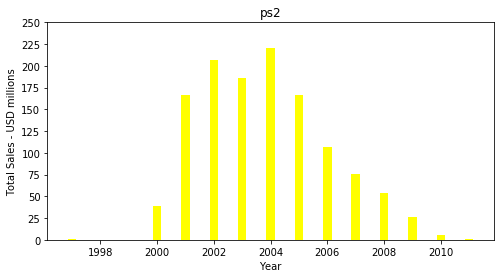

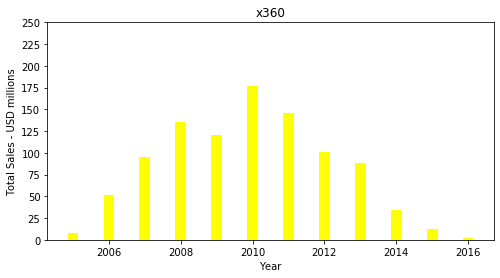

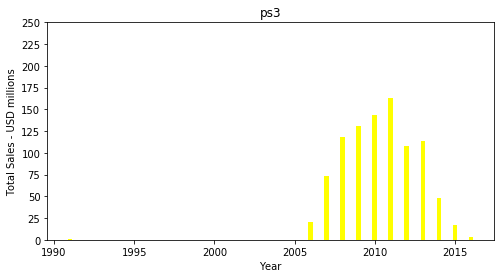

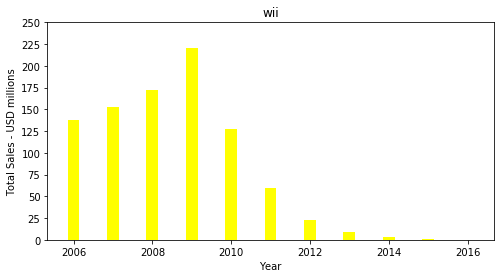

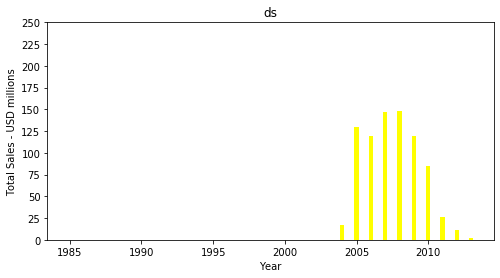

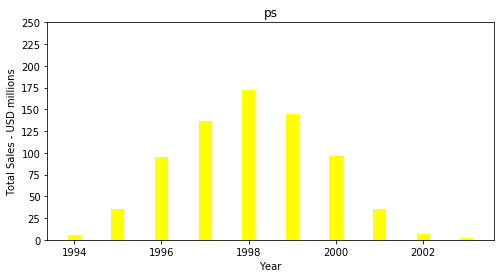

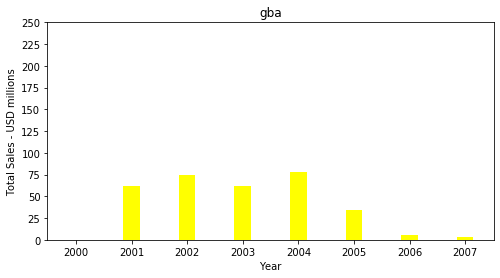

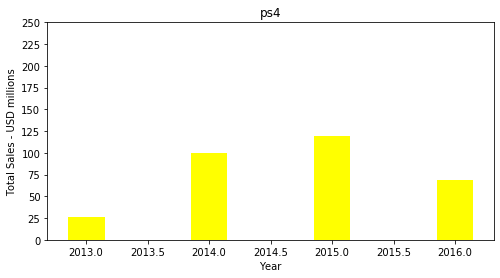

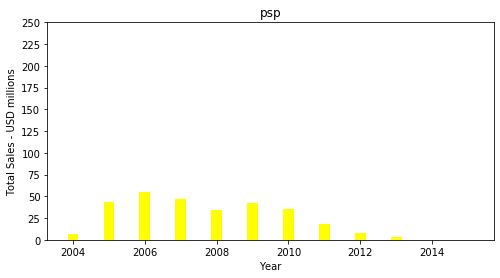

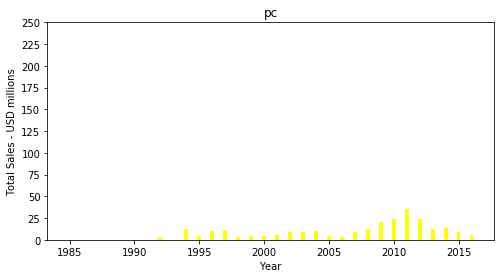

In [43]:
# Create distribution graphs for top 10 best selling platforms and their corresponding annual sales 
for platform in list(top_10_platform.index):
    year=list(platform_year.loc[platform].index)
    sales = platform_year.loc[platform]['total_sales'].to_list()
    plt.figure(figsize=(8,4))
    plt.bar(year,sales, color='yellow', width=0.3)
    plt.yticks([n*25 for n in range(0,11)])
    plt.xlabel('Year')
    plt.ylabel('Total Sales - USD millions')
    plt.title(platform)
    plt.show()

Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- From the 10 graphs above, we do see that the top 3 platforms that used to be famous but now has no sales are PS2, PS, GBA.


In [44]:
# Creating a list the time it takes for a platform to fade 
fade_time=[]
for platform in list(total_sales_platform.index):
    year_list = list(platform_year.loc[platform].index)
    if year_list[-1] < 2016:
        fade_time.append(year_list[-1]-year_list[0])
    
        
fade_time= pd.Series(fade_time)
#Calculating the average it takes for a platform technology to last
print('The average time before a platform fades: ', fade_time.mean())

The average time before a platform fades:  7.818181818181818


c) Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

- Because what we are focusing on analysing the potential platforms and the platform that decreases in demands. For a platform, a new technology usually last for around 7-8 years. I only need to consider from 1999 up until 2016; I would drop all the year before 1999. 
- I am also dropping all the platforms that their total_sales is 0 for more than 3 years consecutively. Because this is a good sign that the technology for that platform is outdated. 

In [45]:
#Eliminating all the old platforms that have been around for more than 8 years and platforms that are not available.
survived_platform = []
for platform in list(total_sales_platform.index):
    year_list = list(platform_year.loc[platform].index)
    #print(year_list[-1])
    if 2016-year_list[-1]<3: 
        survived_platform.append(platform)
print('The platforms that are currently available in the market:', survived_platform)

The platforms that are currently available in the market: ['x360', 'ps3', 'wii', 'ps4', 'psp', 'pc', '3ds', 'xone', 'wiiu', 'psv']


In [46]:
df_games_refined= df_games[df_games['year_of_released']>1999].copy()
df_games_refined=df_games_refined.query('platform in @survived_platform')

d) Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms
  - 'top_10_platform' table is groupby each platforms and sort by descending their total_sales. 
  - 'ps2' are the current leading in sales  
  - To determine either a platform is growing or shinking, we would look at the distribution graphs for the 'survived_platform' 

In [47]:
#Updating the platform_year table with the new table: df_games_refined
platform_year= df_games_refined.groupby(['platform','year_of_released']).sum()
platform_year

na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_released                                              
3ds      2010                  0.28      0.00      0.02         0.02   
         2011                 27.34     18.63     12.83         4.40   
         2012                 17.29     11.87     19.98         2.62   
         2013                 15.94     14.86     23.60         2.64   
         2014                 12.33      8.73     20.69         2.01   
...                             ...       ...       ...          ...   
x360     2016                  0.69      0.71      0.00         0.12   
xone     2013                 11.85      5.34      0.02         1.75   
         2014                 30.97     18.15      0.14         4.81   
         2015                 36.03     18.47      0.17         5.47   
         2016                 14.27      9.63      0.01         2.24   

                           critic_score  user_score  total_sales  
platform year_of_released                                         
3ds      2010                       110         116         0.32  
         2011                      6004        6190        63.20  
         2012                      4877        4946        51.76  
         2013                      4279        4507        57.04  
         2014                      3540        3732        43.76  
...                                 ...         ...          ...  
x360     2016                       614         605         1.52  
xone     2013                      1208        1060        18.96  
         2014                      3992        3742        54.07  
         2015                      5244        4846        60.14  
         2016                      5711        5457        26.15  

[90 rows x 7 columns]

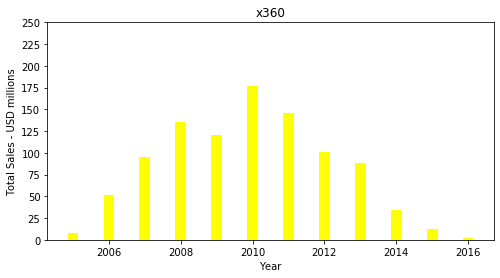

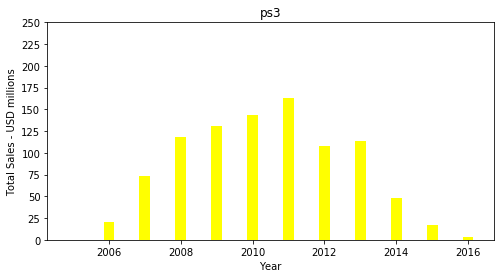

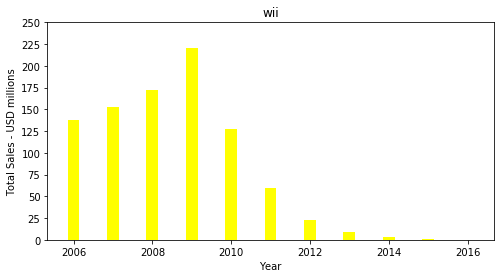

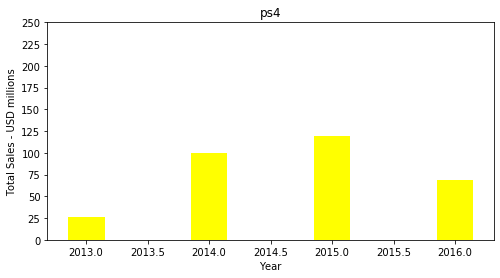

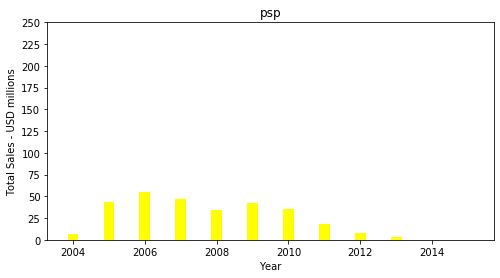

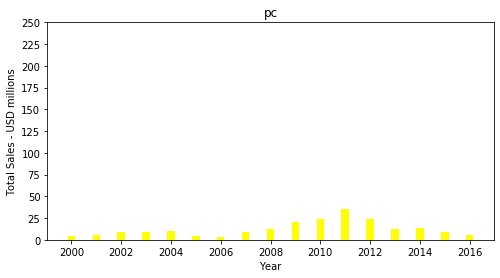

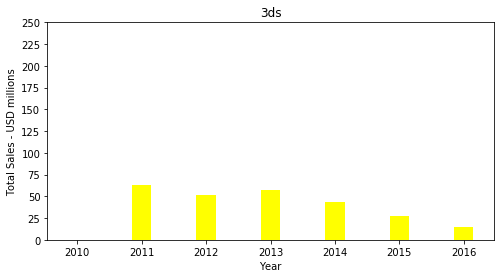

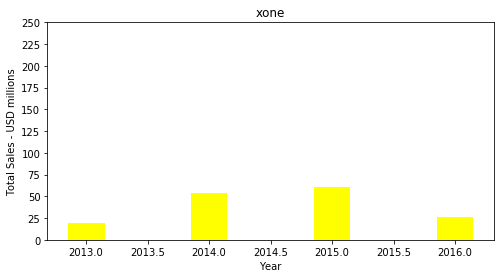

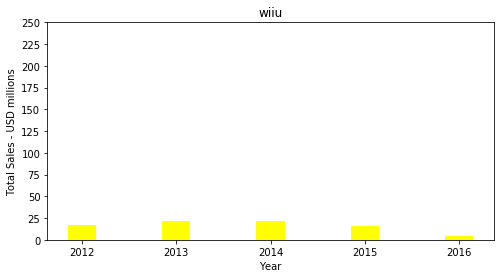

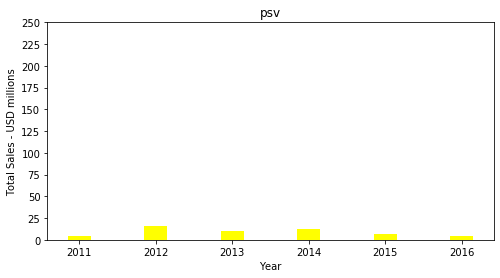

In [48]:
# Create a distribution for the survived_platform
for platform in survived_platform:
    year=list(platform_year.loc[platform].index)
    sales = platform_year.loc[platform]['total_sales'].to_list()
    plt.figure(figsize=(8,4))
    plt.bar(year,sales, color='yellow', width=0.3)
    plt.yticks([n*25 for n in range(0,11)])
    plt.xlabel('Year')
    plt.ylabel('Total Sales - USD millions')
    plt.title(platform)
    plt.show()

Based on the 10 graphs: 
- The shrinking platforms are: 'x360', 'ps3', 'wii', '3ds', 'psp', 'wiiu'
- From this 10 graphs, there are no obvious trends for actual growing platforms. The potential growing platforms are: 'ps4', 'xone'
- The platforms that would still be in business: 'pc'

e) Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [49]:
#Group the games by its corresponding platform 
platform_names = df_games_refined.groupby(['platform','names']).sum()
platform_names

year_of_released  na_sales  eu_sales  \
platform names                                                               
3ds       beyblade burst                          2016      0.00      0.00   
          fire emblem fates                       2015      0.81      0.23   
          frozen: olaf's quest                    2013      0.27      0.27   
          haikyu!! cross team match!              2016      0.00      0.00   
         12-sai. honto no kimochi                 2014      0.00      0.00   
...                                                ...       ...       ...   
xone     xcom 2                                   2016      0.02      0.02   
         zombie army trilogy                      2015      0.05      0.05   
         zombiu                                   2016      0.00      0.01   
         zoo tycoon (2013)                        2013      0.18      0.15   
         zumba fitness: world party               2013      0.17      0.05   

                                      jp_sales  other_sales  critic_score  \
platform names                                                              
3ds       beyblade burst                  0.03         0.00            40   
          fire emblem fates               0.52         0.11            40   
          frozen: olaf's quest            0.00         0.05            43   
          haikyu!! cross team match!      0.04         0.00            19   
         12-sai. honto no kimochi         0.07         0.00            19   
...                                        ...          ...           ...   
xone     xcom 2                           0.00         0.00            87   
         zombie army trilogy              0.00         0.01            62   
         zombiu                           0.00         0.00            77   
         zoo tycoon (2013)                0.00         0.03            32   
         zumba fitness: world party       0.00         0.02            73   

                                      user_score  total_sales  
platform names                                                 
3ds       beyblade burst                      42         0.03  
          fire emblem fates                   42         1.67  
          frozen: olaf's quest                44         0.59  
          haikyu!! cross team match!          21         0.04  
         12-sai. honto no kimochi             21         0.07  
...                                          ...          ...  
xone     xcom 2                               81         0.04  
         zombie army trilogy                  72         0.11  
         zombiu                               77         0.01  
         zoo tycoon (2013)                    34         0.36  
         zumba fitness: world party           62         0.24  

[7786 rows x 8 columns]

Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

- The sales for each platform changes significantly. It can totally range from 939 millions USD to 54 million USD 
    - The highest sales come from 'ps3' and the lowest sales from 'psv'
- For further analysis on the average sales for each game for each platform would make. I would create a boxplot to see the result before calculating concrete results. 


In [50]:
#The total sales for each platform so far
df_games_refined.groupby('platform').sum()['total_sales']

platform
3ds     259.00
pc      209.48
ps3     939.17
ps4     314.14
psp     294.04
psv      54.06
wii     907.51
wiiu     82.19
x360    971.42
xone    159.32
Name: total_sales, dtype: float64

In [51]:
#On average, how much would the average total sales for each platform
print('The average total sales for each platform: ',df_games_refined.groupby('platform').sum()['total_sales'].mean())

The average total sales for each platform:  419.03299999999854


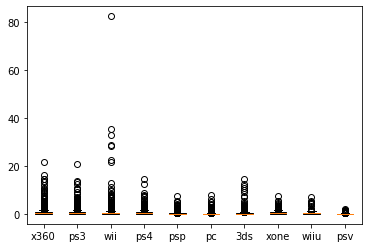

In [52]:
#Boxplot for average total sales for each game for each platform: 
box_plot_platform=[]
for platform in survived_platform: 
    sales= platform_names.loc[platform,'total_sales'].to_list()
    box_plot_platform.append(sales)
#Boxplot 
plt.boxplot(box_plot_platform,patch_artist=True,labels=survived_platform)
plt.show()

- The boxplot shows that the average sales that each game generate is similar throughout every platforms, which is roughly 1 million dollar. But the range that the sales might actually end up can go any from roughly 0 millions USD to 20 millions USD

f) Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales.
- The platform I choose to analyze is 'x360' because it ranks the second highest total_sales and that platform is still available in 2016. I want to understand what factor causes 'x360' to reduce sales. 
 

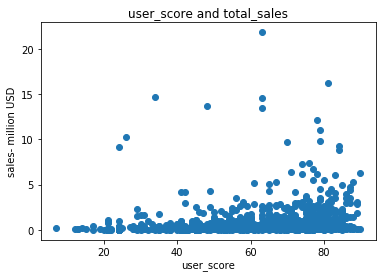

In [53]:
#Scatter plot between user reviews/ professional reviews affecting the sales

#User reviews and sales
user_score= df_games_refined.query('platform == "x360"')['user_score'].to_list()
critic_score=df_games_refined.query('platform == "x360"')['critic_score'].to_list()
sales= df_games_refined.query('platform == "x360"')['total_sales'].to_list()
plt.title('user_score and total_sales')
plt.xlabel('user_score')
plt.ylabel('sales- million USD')
plt.scatter(user_score, sales)
plt.show()

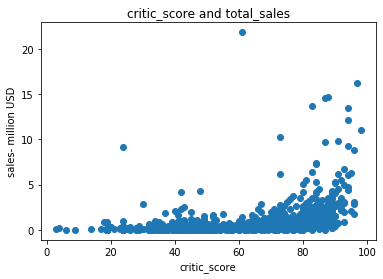

In [54]:
plt.title('critic_score and total_sales')
plt.xlabel('critic_score')
plt.ylabel('sales- million USD')
plt.scatter(critic_score,sales)
plt.show()

- From both of the graphs, there are postive correlation between the total sales and the critic_score/user_score. 
- The user_score and total_sales do show some sort of positive correlation but there are points that are sporadically distributed
- The critic_score and total_sales is more correlated.


In [55]:
#Finding correlation
#User_score and total sales 
print('Coefficient correlation between user reviews and total_sales: ', df_games_refined.query('platform == "x360"')['user_score'].corr(df_games_refined.query('platform == "x360"')['total_sales']))
#Critic_score and total sales
print('Coefficient correlation between critic reviews and total_sales: ', df_games_refined.query('platform == "x360"')['critic_score'].corr(df_games_refined.query('platform == "x360"')['total_sales']))

Coefficient correlation between user reviews and total_sales:  0.18489512471716105
Coefficient correlation between critic reviews and total_sales:  0.36916629330736916


Both the correlation values above conclude the same conclusion. There are relationship between user_score/critic_score and total_sales. The professional reviews have more impact on the sales compared to user reviews

g) Keeping your conclusions in mind, compare the sales of the same games on other platforms.
h) Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [56]:
# Table for games that are produced in various platform 
games_in_various_plat = df_games_refined.groupby(['names','platform']).count()
games_in_various_plat.head(50)
names_in_various_plat=[]
for names in (list(df_games_refined['names'].unique())): 
    if len(games_in_various_plat.loc[names])>1:
        names_in_various_plat.append(names)
names_in_various_plat
games_in_various_plat= df_games_refined.query('names in @names_in_various_plat').groupby(['names','platform']).sum()
games_in_various_plat[['total_sales']].head(40)

total_sales
names                                              platform             
007: quantum of solace                             pc               0.02
                                                   ps3              1.15
                                                   wii              0.65
                                                   x360             1.48
11eyes: crossover                                  psp              0.02
                                                   x360             0.02
2010 fifa world cup south africa                   ps3              1.23
                                                   psp              0.46
                                                   wii              0.43
                                                   x360             0.85
2014 fifa world cup brazil                         ps3              0.61
                                                   x360             0.43
3rd super robot wars z jigoku hen                  ps3              0.23
                                                   psv              0.19
3rd super robot wars z: tengoku-hen                ps3              0.15
                                                   psv              0.19
428: fuusa sareta shibuya de                       ps3              0.02
                                                   psp              0.04
                                                   wii              0.13
50 cent: blood on the sand                         ps3              0.20
                                                   x360             0.21
7 days to die                                      ps4              0.14
                                                   xone             0.05
[prototype 2]                                      pc               0.11
                                                   ps3              0.74
                                                   x360             0.79
[prototype]                                        ps3              1.24
                                                   x360             1.31
abunai: koi no sousa shitsu                        psp              0.01
                                                   psv              0.02
ac/dc live: rock band track pack                   ps3              0.24
                                                   wii              0.26
                                                   x360             0.23
accel world: ginyoku no kakusei                    ps3              0.03
                                                   psp              0.03
accel world: kasoku no chouten                     ps3              0.02
                                                   psp              0.01
ace combat: assault horizon                        ps3              0.74
                                                   x360             0.49
adventure time: explore the dungeon because i d... 3ds              0.14

- As I mention before, 'ps3' has highest total_sales. According to the above table, definitely that a game sales better if it is available in 'ps3'.
- Because of the nonpopularity of 'psv', not that many games produced in that platform; if they do, the sales of a game in 'psv' don't generate that much interest compared to the more popular one 'ps3' 

h) Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

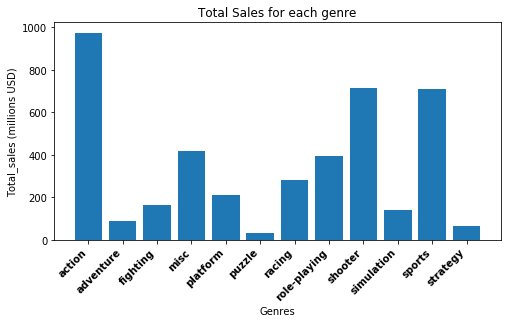

In [57]:
#A table that is group by genre and suming all the total_sales 
top_genre_sales = df_games_refined.groupby('genre').sum()
top_genre_sales
#Create a bar distribution for all the available genre 
plt.figure(figsize=(8,4))
plt.bar(np.arange(len(list(top_genre_sales.index))),list(top_genre_sales['total_sales']))
plt.xticks(np.arange(len(list(top_genre_sales.index))), list(top_genre_sales.index), rotation=45, fontweight='bold', fontsize='10', horizontalalignment='right')
plt.xlabel('Genres')
plt.ylabel('Total_sales (millions USD)')
plt.title('Total Sales for each genre')
plt.show()


- Most profitable genres: 
    - Action, shooter, sports 
- Least profitable genres: 
    - Puzzle, Strategy, Adventure

# IV) Create a user profile for each region
For each region (NA, EU, JP), determine:
 
 - The top five platforms. Describe variations in their market shares from region to region.
 - The top five genres. Explain the difference.
 - Do ESRB ratings affect sales in individual regions?

###  The top five platforms. Describe variations in their market shares from region to region.
- Finding top 5 platforms for each regions: 
    - 'na_top_5_platform': top 5 platforms for NA region
    - 'jp_top_5_platform': top 5 platforms for JP region
    - 'eu_top_5_platform': top 5 platforms for EU region

In [58]:
# Regions profitable platoform
na_top_5_platform = total_sales_platform.sort_values('na_sales',ascending=False).head(5)
eu_top_5_platform= total_sales_platform.sort_values('eu_sales',ascending=False).head(5)
jp_top_5_platform= total_sales_platform.sort_values('jp_sales',ascending=False).head(5)

In [59]:
na_top_5_platform['na_sales']

platform
x360    602.47
ps2     583.84
wii     496.90
ps3     393.49
ds      382.40
Name: na_sales, dtype: float64

In [60]:
eu_top_5_platform['eu_sales']

platform
ps2     339.29
ps3     330.29
x360    270.76
wii     262.21
ps      213.61
Name: eu_sales, dtype: float64

In [61]:
jp_top_5_platform['jp_sales']

platform
ds      175.57
ps      139.82
ps2     139.20
snes    116.55
3ds     100.67
Name: jp_sales, dtype: float64

- Within the top 5 platorms for every region, the common platform that creates the most profits is 'ps2'. 
- The market share for EU and North America is pretty similar because there are a lot of similar platforms, 'ps3', 'x360', 'ps2', 'wii'. The difference is that in NA region, users prefer 'ps' and in EU region, users prefer 'ps' 

###  The top five genres. Explain the difference.
- Finding the top 5 genre for each region: 
   - na_top_genre: top 5 genre for NA region 
   - eu_top_genre: top 5 genre for EU region 
   - jp_top_genre: top 5 genre for JP region 

In [62]:
top_genre_sales

,year_of_released,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
genre,,,,,,,,
action,3934572,449.77,324.41,86.03,114.40,115039,119281,974.61
adventure,1315498,35.05,26.45,17.52,8.56,21242,23605,87.58
fighting,647375,84.09,40.02,22.61,17.74,19439,19967,164.46
misc,1604203,229.48,115.37,33.12,38.22,33769,33811,416.19
platform,476452,101.64,65.71,23.23,21.72,15001,15225,212.30
puzzle,323429,15.04,8.13,4.34,2.72,7541,7952,30.23
racing,956636,120.93,112.53,13.32,36.10,29352,28904,282.88
role-playing,1546569,151.50,98.27,110.20,32.86,45882,47305,392.83
shooter,1423300,370.64,240.43,18.03,84.21,47615,46314,713.31


In [63]:
#Regions profitable genres
na_top_5_genre = top_genre_sales.sort_values('na_sales',ascending=False).head(5)
eu_top_5_genre = top_genre_sales.sort_values('eu_sales',ascending=False).head(5)
jp_top_5_genre = top_genre_sales.sort_values('jp_sales',ascending=False).head(5)


In [64]:
na_top_5_genre['na_sales']

genre
action          449.77
shooter         370.64
sports          358.25
misc            229.48
role-playing    151.50
Name: na_sales, dtype: float64

In [65]:
eu_top_5_genre['eu_sales']

genre
action     324.41
shooter    240.43
sports     236.86
misc       115.37
racing     112.53
Name: eu_sales, dtype: float64

In [66]:
jp_top_5_genre['jp_sales']

genre
role-playing    110.20
action           86.03
sports           37.54
misc             33.12
platform         23.23
Name: jp_sales, dtype: float64

- The common genres that are famous in the 3 regions: 'action', 'sports', 'misc'
- Suprisingly, again, top 5 genres for NA and EU are very similar; most of top 5 genres are the same, 'action', 'shooter', 'sports', 'misc'; 
- The difference is in NA region, the users prefer 'role-playing', in EU region, the users prefer 'racing' 
- For the 'Japan' market share, their most profitable genre is 'role-playing'
- The reason why there are somewhat huge difference between the best selling genre in 'Japan', 'EU' and 'NA' because of culture. There are somewhat resemblences in the EU and NA customer's culture so therefore these 2 regions share similarity in both top genres and top platforms 

### Do ESRB ratings affect sales in individual regions?
- I am grouping the df_refined_region based on 'ESRB' ratings
- Create a bar plot to see the difference between the 3 region


In [67]:
df_games_refined.groupby(['rating_new']).sum()[['na_sales','eu_sales','jp_sales']]

,na_sales,eu_sales,jp_sales
rating_new,,,
E,974.76,656.54,225.52
M,595.08,418.51,47.54
T,433.34,270.23,117.62


- Because the majority of the games are in the E rating. It is not surprised that in all 3 regions, the 'E' rating has the highest sales. 
- In the NA region, there are a roughly 300 millions USD difference between E and other ratings. This might mean that the users in the NA has a strong preference towards E rating
- In JP regions, the sales for M rating is not as preference comparing to other rating games. 
- So far, most likely that the E rating games would generate the more sales compared to other due to its vast audience and all ages friendly.


# V) Test the following hypotheses:
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

### Average user ratings of the Xbox One and PC platforms are the same.
- Null Hypothesis: , $H_0$: There is no difference in user_score for both xbox one and pc
- Alternative Hypothesis, $H_a$: There are difference in user_score between xbox one and pc
- The significant level I pick is 5% because in this hypothesis testing, we want to have some eveidence that these

In [68]:
#Conducting the hypothesis test: 
xbox_review= df_games_refined.query('platform == "xone"')['user_score']
pc_review = df_games_refined.query('platform == "pc"')['user_score']
alpha = 0.01 #Significant level 
test2_results = st.ttest_ind(list(xbox_review), list(pc_review),equal_var=False)

print('p-value: ', test2_results.pvalue)

if (test2_results.pvalue < alpha):
        print("We reject the null hypothesis: There is difference in the user_score between Xbox One and PC")
else:
        print("We can't reject the null hypothesis: There is no difference in the user_score between Xbox One and PC")

p-value:  0.02246786698019901
We can't reject the null hypothesis: There is no difference in the user_score between Xbox One and PC


In [69]:
print('Average user score for Xbox: ',xbox_review.mean())
print('Average user score for PC: ', pc_review.mean())

Average user score for Xbox:  61.15384615384615
Average user score for PC:  64.04817987152035


There is no difference in the average user_score between the 2 platforms. From the average user_score for each platform, we see that user_score for PC is larger compared to the user_score for PC. However, this result doesn't mean that there is difference between the two. 

### Average user ratings for the Action and Sports genres are different.
- Null Hypothesis: , $H_0$: There is no difference in user_score for both Action and Sports
- Alternative Hypothesis, $H_a$: There are difference in user_score between Action and Sports
- The significant level I pick is 5% because in this hypothesis testing, we want to have some eveidence that these

In [70]:
#Conducting the hypothesis test: 
action_review= df_games_refined.query('genre == "action"')['user_score']
sports_review = df_games_refined.query('genre == "sports"')['user_score']
alpha = 0.05 #Significant level 
test2_results = st.ttest_ind(list(action_review), list(sports_review),equal_var=False)

print('p-value: ', test2_results.pvalue)

if (test2_results.pvalue < alpha):
        print("We reject the null hypothesis: There is difference in the user_score between Xbox One and PC")
else:
        print("We can't reject the null hypothesis: There is no difference in the user_score between Xbox One and PC")

p-value:  2.567946453848348e-16
We reject the null hypothesis: There is difference in the user_score between Xbox One and PC


In [71]:
print('Average user score for Action: ',action_review.mean())
print('Average user score for Sports: ', sports_review.mean())

Average user score for Action:  60.9821063394683
Average user score for Sports:  55.566074950690336


- It is very likely that the average user_score for action and sports genre is different, eventhough the user_score for both genres have fairly close values. 

# VI) Conclusions: 
For this data set, the tasks are to identify patterns from previous sales whether a game/ a platform/ a genre succeed. 

- Top 10 games that are currently the most profitable and popular 

In [72]:
df_games_refined.groupby('names').sum().sort_values('total_sales',ascending=False).head(10)[['total_sales']]

,total_sales
names,
wii sports,82.54
grand theft auto v,56.58
mario kart wii,35.52
wii sports resort,32.77
call of duty: modern warfare 3,30.60
call of duty: black ops,30.24
call of duty: black ops ii,29.40
wii play,28.91
new super mario bros. wii,28.32


- Platforms analysis:  
    - Top 10 platforms that currently generate the most sales:

In [73]:
df_games_refined.groupby('platform').sum().sort_values(by='total_sales',ascending=False)['total_sales']

platform
x360    971.42
ps3     939.17
wii     907.51
ps4     314.14
psp     294.04
3ds     259.00
pc      209.48
xone    159.32
wiiu     82.19
psv      54.06
Name: total_sales, dtype: float64

From the distribution graphs:
   * The platforms that are becoming less popular are x360, PS3, Wii, 3DS and WiiU. 
   * The potential growing platforms are PS4 and XOne 

- User/Critic scores and total sales: 
    - The critic scores influence the total sales more than the user scores. The correlation coefficient of the critic scores and total sales (0.37) is higher than the correlation coefficient of user scores and total sales
    
$\rightarrow$ It is better to investigate in promoting game that has high critic scores

- Genres and total sales: 
    - The most profitable genre is action. The total sales for games that have action as the genre generate around 1000 millions USD. 
- ESRB rating preference: 
    - Users prefer game that are rated "E - everyone". More games have E as their rating!

### Potential Marketing Strategies: 
- The common strategy for all regions: 
    - Promoting he top 10 games that are currently the best-selling games in the world (including the total amount of money/or games have sold through out the worlds are an excellent way to attract customer) 
    - Focusing on promoting games that have genre 'action' with high critic scores and are available in famous platform PS, PS2 and DS
    
    
- The store should have their strategy slightly different depending on their markets: 
    - In Japan, beside games that have genre action and are available in PS: 
        - Focusing promoting game that have role-playing genre
        - Other preference platforms are snes, 3DS
        - Maybe promoting other famous genres sports, misc, platform 
    - NA and EU markets share a lot of similarity so it is reasonable if they share similar marketing strategies 
        - Other preference platforms are PS3, Wii, X360
        - Maybe promoting other famous genres shooter, sports, misc, role-playing and racing 


- Both X-One and PS4 are a potential growing platforms, we can also take advantages of that growth to generate more interest